In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})
df['States']="CA NV AZ".split()
df.set_index('States',inplace=True)
print(df)

          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2
AZ      NaN  NaN  3


In [6]:
print("\nDropping any rows with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=0))



Dropping any rows with a NaN value
-----------------------------------
          A    B  C
States             
CA      1.0  5.0  1


In [7]:
print("\nDropping any column with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=1))



Dropping any column with a NaN value
-----------------------------------
        C
States   
CA      1
NV      2
AZ      3


In [8]:
df

,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,NaN,2
AZ,NaN,NaN,3


In [9]:
df.dropna(axis=0, thresh=4)

,A,B,C
States,,,


In [10]:
df

,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,NaN,2
AZ,NaN,NaN,3


In [11]:
print("\nFilling values with a default value\n",'-'*35, sep='')
df.fillna(value='xyz')



Filling values with a default value
-----------------------------------


,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,xyz,2
AZ,xyz,xyz,3


In [12]:
print("\nFilling values with a default value\n",'-'*35, sep='')
df.fillna(value=1) ## filling the null values with 1



Filling values with a default value
-----------------------------------


,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,1.0,2
AZ,1.0,1.0,3


In [13]:
df

,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,NaN,2
AZ,NaN,NaN,3


In [14]:
df['A'].mean()

1.5

In [15]:
print("\nFilling values with a computed value (mean of column A here)\n",'-'*60, sep='')
df.fillna(value=df['A'].mean())  ### it is same as df.fillna(value = 1.5)


Filling values with a computed value (mean of column A here)
------------------------------------------------------------


,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,1.5,2
AZ,1.5,1.5,3


In [16]:
df["A"].fillna(value=df['A'].mean(),inplace = True)

In [17]:
df

,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,NaN,2
AZ,1.5,NaN,3


In [18]:
df["B"].fillna(value=df['B'].mean(),inplace = True)

In [19]:
df

,A,B,C
States,,,
CA,1.0,5.0,1
NV,2.0,5.0,2
AZ,1.5,5.0,3


In [20]:
## Sample Data 

In [21]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [22]:
byComp = df.groupby('Company')
byComp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [23]:
byComp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [24]:
byComp.sum().sort_values(by ="Sales",ascending = False)

,Sales
Company,
FB,593
MSFT,464
GOOG,320


In [25]:
byComp = df.groupby('Company')
print("\nGrouping by 'Company' column and listing mean sales\n",'-'*55, sep='')
print(byComp.mean())



Grouping by 'Company' column and listing mean sales
-------------------------------------------------------
         Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0


In [26]:
print("\nGrouping by 'Company' column and listing sum of sales\n",'-'*55, sep='')
print(byComp.sum())



Grouping by 'Company' column and listing sum of sales
-------------------------------------------------------
         Sales
Company       
FB         593
GOOG       320
MSFT       464


In [27]:
df.groupby('Company').describe().loc["FB"]

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

In [28]:
pd.DataFrame(df.groupby('Company').describe().loc["FB"]).transpose()

Sales                                                       
   count   mean        std    min     25%    50%     75%    max
FB   2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0

In [29]:
print("\nAll in one line of command (Stats for 'FB')\n",'-'*65, sep='')
print(pd.DataFrame(df.groupby('Company').describe().loc['FB']).transpose())



All in one line of command (Stats for 'FB')
-----------------------------------------------------------------
   Sales                                                       
   count   mean        std    min     25%    50%     75%    max
FB   2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0


In [30]:
'-'*65

'-----------------------------------------------------------------'

In [31]:
print("\nAll in one line of command (Stats for 'FB')\n",'-'*65, sep='')

#\n : New line 
## "string" * n = prints string "n" times


All in one line of command (Stats for 'FB')
-----------------------------------------------------------------


In [32]:
(pd.DataFrame(df.groupby('Company').describe().loc['FB'])).transpose() 

Sales                                                       
   count   mean        std    min     25%    50%     75%    max
FB   2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0

In [33]:
## id it is single row it tries to show in the following way

In [34]:
df.groupby('Company').describe().loc['FB']

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

In [35]:
## Multiple rows it shows in following way
df.groupby('Company').describe().loc[['GOOG', 'MSFT']]

Sales                                                      
        count   mean         std    min    25%    50%    75%    max
Company                                                            
GOOG      2.0  160.0   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  232.0  152.735065  124.0  178.0  232.0  286.0  340.0

In [36]:
## This is how its defined by the pandas developers, if we need same view for single row also so we do transpose

In [37]:
print("\nSame type of extraction with little different command\n",'-'*68, sep='')
df.groupby('Company').describe().loc[['GOOG', 'MSFT']]


Same type of extraction with little different command
--------------------------------------------------------------------


Sales                                                      
        count   mean         std    min    25%    50%    75%    max
Company                                                            
GOOG      2.0  160.0   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  232.0  152.735065  124.0  178.0  232.0  286.0  340.0

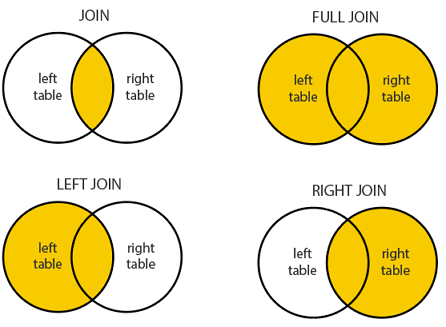

In [38]:
# Merging two data frames
# Creating data frames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])


In [39]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [40]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[0, 1, 2, 3])


In [41]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [42]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8,9,10,11])


In [43]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [44]:
print("\nThe DataFrame number 1\n",'-'*30, sep='')
print(df1)



The DataFrame number 1
------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


In [45]:
print("\nThe DataFrame number 2\n",'-'*30, sep='')
print(df2)



The DataFrame number 2
------------------------------
    A   B   C   D
0  A4  B4  C4  D4
1  A5  B5  C5  D5
2  A6  B6  C6  D6
3  A7  B7  C7  D7


In [46]:
print("\nThe DataFrame number 3\n",'-'*30, sep='')
print(df3)


The DataFrame number 3
------------------------------
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [47]:
#concatenation
df_cat1 = pd.concat([df1,df2,df3], axis=0) ## axis = 0 means rows, Combine all 3 dataframe rowise
print("\nAfter concatenation along row\n",'-'*30, sep='')
print(df_cat1)



After concatenation along row
------------------------------
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
0    A4   B4   C4   D4
1    A5   B5   C5   D5
2    A6   B6   C6   D6
3    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [48]:
df_cat1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [49]:
df_cat1.loc[0]

,A,B,C,D
0,A0,B0,C0,D0
0,A4,B4,C4,D4


In [50]:
df_cat1.iloc[0]

A    A0
B    B0
C    C0
D    D0
Name: 0, dtype: object

In [51]:
df_cat1.reset_index(drop= True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [52]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [53]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [54]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [55]:
df_cat2 = pd.concat([df1,df2,df3], axis=1)
print("\nAfter concatenation along column\n",'-'*60, sep='')
print(df_cat2)



After concatenation along column
------------------------------------------------------------
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0   A4   B4   C4   D4  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1   A5   B5   C5   D5  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2   A6   B6   C6   D6  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11


In [56]:
df_cat2.fillna(value=0, inplace=True)
print("\nAfter filling missing values with zero\n",'-'*60, sep='')
print(df_cat2)


After filling missing values with zero
------------------------------------------------------------
     A   B   C   D   A   B   C   D    A    B    C    D
0   A0  B0  C0  D0  A4  B4  C4  D4    0    0    0    0
1   A1  B1  C1  D1  A5  B5  C5  D5    0    0    0    0
2   A2  B2  C2  D2  A6  B6  C6  D6    0    0    0    0
3   A3  B3  C3  D3  A7  B7  C7  D7    0    0    0    0
8    0   0   0   0   0   0   0   0   A8   B8   C8   D8
9    0   0   0   0   0   0   0   0   A9   B9   C9   D9
10   0   0   0   0   0   0   0   0  A10  B10  C10  D10
11   0   0   0   0   0   0   0   0  A11  B11  C11  D11


In [57]:
# merging by a common key

In [58]:
left = pd.DataFrame({'key': ['K0', 'K8', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})


In [59]:
left

,key,A,B
0,K0,A0,B0
1,K8,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [60]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [61]:
print("\nThe DataFrame 'left'\n",'-'*30, sep='')
print(left)



The DataFrame 'left'
------------------------------
  key   A   B
0  K0  A0  B0
1  K8  A1  B1
2  K2  A2  B2
3  K3  A3  B3


In [62]:
print("\nThe DataFrame 'right'\n",'-'*30, sep='')
print(right)


The DataFrame 'right'
------------------------------
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [63]:
merge1= pd.merge(left,right,how='inner',on='key')
print("\nAfter simple merging with 'inner' method\n",'-'*50, sep='')
print(merge1)


After simple merging with 'inner' method
--------------------------------------------------
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3


In [64]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [65]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [66]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [67]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [68]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [69]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [70]:
pd.merge(left, right, how='left',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [71]:
pd.merge(left, right, how='right',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [72]:
#join operators
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [73]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [74]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [75]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [76]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## use of apply functions

In [77]:
# Define a function
def testfunc(x):
    if (x> 500):
        return (10*np.log10(x))
    else:
        return (x/10)

In [124]:
df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8,9,10],
                   'col2':[444,555,666,444,333,222,666,777,666,555],
                   'col3':'aaa bb c dd eeee fff gg h iii j'.split()})
df

,col1,col2,col3
0,1,444,aaa
1,2,555,bb
2,3,666,c
3,4,444,dd
4,5,333,eeee
5,6,222,fff
6,7,666,gg
7,8,777,h
8,9,666,iii
9,10,555,j


### Lambda 

syntax :

  func_name = lambda input: operation 

In [118]:
lam=lambda x : x+1 ## Lambda is used to create function in single line 

In [120]:
## Lambda function to perfrom square of a no

In [121]:
sq = lambda x:x*x

In [122]:
sq(10)

100

In [119]:
lam(10)

11

In [125]:
df

,col1,col2,col3
0,1,444,aaa
1,2,555,bb
2,3,666,c
3,4,444,dd
4,5,333,eeee
5,6,222,fff
6,7,666,gg
7,8,777,h
8,9,666,iii
9,10,555,j


In [126]:
df['FuncApplied'] = df['col2'].apply(lambda x : x/10)
print(df)

   col1  col2  col3  FuncApplied
0     1   444   aaa         44.4
1     2   555    bb         55.5
2     3   666     c         66.6
3     4   444    dd         44.4
4     5   333  eeee         33.3
5     6   222   fff         22.2
6     7   666    gg         66.6
7     8   777     h         77.7
8     9   666   iii         66.6
9    10   555     j         55.5


In [127]:
## apply() is used to apply function to specific DataFrame col

In [82]:
df['col3length']= df['col3'].apply(len)
print(df)

   col1  col2  col3  FuncApplied  col3length
0     1   444   aaa     6.095825           3
1     2   555    bb     6.318968           2
2     3   666     c     6.501290           1
3     4   444    dd     6.095825           2
4     5   333  eeee     5.808142           4
5     6   222   fff     5.402677           3
6     7   666    gg     6.501290           2
7     8   777     h     6.655440           1
8     9   666   iii     6.501290           3
9    10   555     j     6.318968           1


In [128]:
def check_value(x):
    if x>300:
        return "Yes"
    else:
        return "No"

In [130]:
check_value(200)

'No'

In [131]:
df

,col1,col2,col3,FuncApplied
0,1,444,aaa,44.4
1,2,555,bb,55.5
2,3,666,c,66.6
3,4,444,dd,44.4
4,5,333,eeee,33.3
5,6,222,fff,22.2
6,7,666,gg,66.6
7,8,777,h,77.7
8,9,666,iii,66.6
9,10,555,j,55.5


In [133]:
df["Check_value"] = df["col2"].apply(check_value)

In [134]:
df

,col1,col2,col3,FuncApplied,Check_value
0,1,444,aaa,44.4,Yes
1,2,555,bb,55.5,Yes
2,3,666,c,66.6,Yes
3,4,444,dd,44.4,Yes
4,5,333,eeee,33.3,Yes
5,6,222,fff,22.2,No
6,7,666,gg,66.6,Yes
7,8,777,h,77.7,Yes
8,9,666,iii,66.6,Yes
9,10,555,j,55.5,Yes


In [83]:
df['FuncApplied'].apply(lambda x: np.sqrt(x)) ## square root of the col

0    2.468972
1    2.513756
2    2.549763
3    2.468972
4    2.410009
5    2.324366
6    2.549763
7    2.579814
8    2.549763
9    2.513756
Name: FuncApplied, dtype: float64

In [135]:
print("\nSum of the column 'FuncApplied' is: ",df['FuncApplied'].sum())



Sum of the column 'FuncApplied' is:  532.8000000000001


In [136]:
print("Mean of the column 'FuncApplied' is: ",df['FuncApplied'].mean())


Mean of the column 'FuncApplied' is:  53.279999999999994


In [137]:
print("Std dev of the column 'FuncApplied' is: ",df['FuncApplied'].std())


Std dev of the column 'FuncApplied' is:  17.19604605716093


In [138]:
print("Min and max of the column 'FuncApplied' are: ",df['FuncApplied'].min(),"and",df['FuncApplied'].max())

Min and max of the column 'FuncApplied' are:  22.2 and 77.7


In [88]:
### Deletion, sorting, list of column and row names

In [140]:
print("\nName of columns\n",'-'*20, sep='')
df.columns ## it gives col names of dataframe



Name of columns
--------------------


Index(['col1', 'col2', 'col3', 'FuncApplied', 'Check_value'], dtype='object')

In [141]:
l = list(df.columns)
print("\nColumn names in a list of strings for later manipulation:",l)


Column names in a list of strings for later manipulation: ['col1', 'col2', 'col3', 'FuncApplied', 'Check_value']


In [143]:
df

,col1,col2,col3,FuncApplied,Check_value
0,1,444,aaa,44.4,Yes
1,2,555,bb,55.5,Yes
2,3,666,c,66.6,Yes
3,4,444,dd,44.4,Yes
4,5,333,eeee,33.3,Yes
5,6,222,fff,22.2,No
6,7,666,gg,66.6,Yes
7,8,777,h,77.7,Yes
8,9,666,iii,66.6,Yes
9,10,555,j,55.5,Yes


In [148]:
print("\nDeleting last column by 'del' command\n",'-'*50, sep='')## print statement
del df['col3length']  ## Delete the col 
print(df) ## print df
 



Deleting last column by 'del' command
--------------------------------------------------
   col1  col2  col3  FuncApplied
0     1   444   aaa         44.4
1     2   555    bb         55.5
2     3   666     c         66.6
3     4   444    dd         44.4
4     5   333  eeee         33.3
5     6   222   fff         22.2
6     7   666    gg         66.6
7     8   777     h         77.7
8     9   666   iii         66.6
9    10   555     j         55.5


In [146]:
df

,col1,col2,col3,FuncApplied,col3length
0,1,444,aaa,44.4,3
1,2,555,bb,55.5,2
2,3,666,c,66.6,1
3,4,444,dd,44.4,2
4,5,333,eeee,33.3,4
5,6,222,fff,22.2,3
6,7,666,gg,66.6,2
7,8,777,h,77.7,1
8,9,666,iii,66.6,3
9,10,555,j,55.5,1


In [147]:
df.sort_values(by='col2') #inplace=False by default

,col1,col2,col3,FuncApplied,col3length
5,6,222,fff,22.2,3
4,5,333,eeee,33.3,4
0,1,444,aaa,44.4,3
3,4,444,dd,44.4,2
1,2,555,bb,55.5,2
9,10,555,j,55.5,1
2,3,666,c,66.6,1
6,7,666,gg,66.6,2
8,9,666,iii,66.6,3
7,8,777,h,77.7,1


In [93]:
df.sort_values(by='FuncApplied',ascending=False) #inplace=False by default

,col1,col2,col3,FuncApplied,col3length
7,8,777,h,6.655440,1
2,3,666,c,6.501290,1
6,7,666,gg,6.501290,2
8,9,666,iii,6.501290,3
1,2,555,bb,6.318968,2
9,10,555,j,6.318968,1
0,1,444,aaa,6.095825,3
3,4,444,dd,6.095825,2
4,5,333,eeee,5.808142,4
5,6,222,fff,5.402677,3


In [149]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[None,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [95]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [151]:
df

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [150]:
df.isnull().sum() ## it checks null values by col

col1    1
col2    1
col3    0
dtype: int64

In [96]:
df.fillna('FILL') ## fill the na values

,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


In [97]:
df1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [98]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [99]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [100]:
pd.merge(df1, df2, how='inner')

,A,B,C,D


In [101]:
pd.merge(df1, df2, how='outer')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [102]:
pd.merge(df1, df2, how='left')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [103]:
pd.merge(df1, df2, how='right')

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [152]:
maths = pd.DataFrame({'Name': ['AK', 'BS', 'RA', 'GP'],
                     'Math_Marks': ['K0', 'K1', 'K0', 'K1']})
    
science = pd.DataFrame({'Name': ['BS', 'SU', 'GP'],
                                  'Sci_marks': ['C0', 'C1', 'C2']})

history = pd.DataFrame({"Name" : ["AK","GP"],
                       "His_marks" : ["H1","H2"] })

biology = pd.DataFrame({"Name" : ["GP","BS","SU"],
                       "Bio_marks":["b1","b2","b3"]})

In [153]:
maths

,Name,Math_Marks
0,AK,K0
1,BS,K1
2,RA,K0
3,GP,K1


In [154]:
science

,Name,Sci_marks
0,BS,C0
1,SU,C1
2,GP,C2


   
AK  Maths

BS  both

RA  Maths

SU Sci

GP both

In [155]:
pd.merge(maths, science, how='inner',on=['Name']) 

,Name,Math_Marks,Sci_marks
0,BS,K1,C0
1,GP,K1,C2


In [156]:
pd.merge(maths, science, how='left',on=['Name'])  
## all the students which are taking maths  including the ones which are taking both
## I also want to see that students which took maths how they are performing in science

,Name,Math_Marks,Sci_marks
0,AK,K0,NaN
1,BS,K1,C0
2,RA,K0,NaN
3,GP,K1,C2


In [157]:
pd.merge(maths, science, how='right',on=['Name'])   ## all the students of science  + common part 


,Name,Math_Marks,Sci_marks
0,BS,K1,C0
1,SU,NaN,C1
2,GP,K1,C2


In [158]:
maths.set_index("Name",inplace = True)
science.set_index("Name",inplace = True)

In [159]:
maths.join(science) ## left join left df : maths & right dataframe is science

,Math_Marks,Sci_marks
Name,,
AK,K0,NaN
BS,K1,C0
RA,K0,NaN
GP,K1,C2


In [160]:
science.join(maths) #left join on science

,Sci_marks,Math_Marks
Name,,
BS,C0,K1
SU,C1,NaN
GP,C2,K1


In [161]:
history

,Name,His_marks
0,AK,H1
1,GP,H2


In [162]:
ms=pd.merge(maths, science, how='inner',on=['Name']) 

In [163]:
msh=pd.merge(history,ms,how='inner',on=['Name'])
msh

,Name,His_marks,Math_Marks,Sci_marks
0,GP,H2,K1,C2


In [166]:
## Revise the Joins
list_df = [maths,science,history,biology]

def join_dfs(list_df):
    for i in range(len(list_df)):
        if i ==0:
            com=pd.merge(list_df[0], list_df[1], how='inner',on=['Name']) 
        elif i>1:
            com=pd.merge(list_df[i], com, how='inner',on=['Name']) 
    
    return com
        
        
## Dont worry       

In [167]:
join_dfs(list_df)


,Name,Bio_marks,His_marks,Math_Marks,Sci_marks
0,GP,b1,H2,K1,C2
